<a href="https://colab.research.google.com/github/Ayushman0Singh/BookRecommendation/blob/main/BookRecomendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BOOK RECOMMENDATION**

# Business Problem

Online book reading and selling websites like Kindle and Goodreads compete against each other on many factors. One of those important factors is their book recommendation system. A book recommendation system is designed to recommend books of interest to the buyer.


The purpose of a book recommendation system is to predict buyer’s interest and recommend books to them accordingly. A book recommendation system can take into account many parameters like book content and book quality by filtering user reviews.I will try to make a recommendation system for our given data set.

In [1]:
#importing necessary libraries 
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# we will import libraries further as per need

In [2]:
from google.colab import drive # mounting drive
drive.mount('/content/drive')

Mounted at /content/drive


We have been given 3 data sets, Lets have a look at all the data provided to us and its properties

In [4]:
books = pd.read_csv("/content/drive/MyDrive/Almabetter/Capstone Projects/Unsupervised ML/Copy of Books.csv")
users = pd.read_csv("/content/drive/MyDrive/Almabetter/Capstone Projects/Unsupervised ML/Copy of Users.csv")
ratings = pd.read_csv("/content/drive/MyDrive/Almabetter/Capstone Projects/Unsupervised ML/Copy of Ratings.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [10]:
books.head(4) # checking the head and columns 

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...


In [11]:
#dimensions of book dataframe
books.shape

(271360, 8)

In [12]:
#checking users head/columns
users.head(5)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [13]:
#checking shape
users.shape

(278858, 3)

In [15]:
#checking our 3rd data-set
ratings.head(5)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [17]:
# dimensions of the 3rd data set
ratings.shape

(1149780, 3)

# Data Cleaning and Feature Engineering

Before moving onto the data visualisation and EDA. First, lets make sure our data is ready to use.


**Checking for null values data**

In [18]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [22]:
#checking the ratings df for null values
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

# Exploratory Data Analysis

**Rating Distribution**

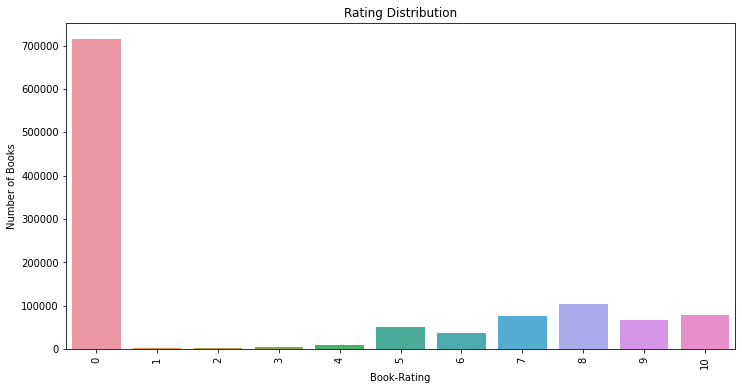

Average rating recieved by all the apps is 2.8669501991685364.


In [20]:
# show the distribution of rating
plt.figure(figsize=(12, 6))
sns.countplot(x='Book-Rating', data=ratings)
plt.title('Rating Distribution')
plt.xticks(rotation=90)
plt.ylabel('Number of Books')
plt.show()
print('Average rating recieved by all the apps is {}.'.format(ratings['Book-Rating'].mean()))

Most of the rating are zero



**HYPOTHESIS**: Most of the users are between the age of 20 to 30 

Text(0, 0.5, 'Count')

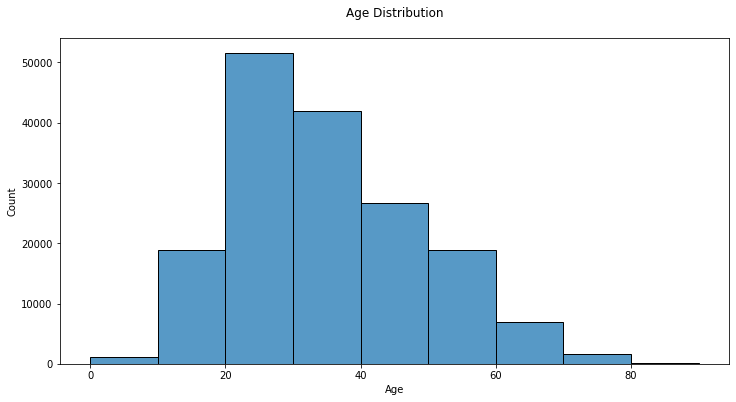

In [28]:
# plotting the age of thee users 
plt.figure(figsize=(12, 6))
sns.histplot(data=users['Age'], bins=np.arange(0,100,10))
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')

# **COLLABORATIVE FILTERING**

We will be using Two methods for our Books recommendation system, first we will use a Memory Based colaborative model. Then we will also make a model based Colaboraative recomendation system. We will not be using content based algorithms for recommendation since we do not have enough indivisual features for users and the books. Users only has one extra feature. 

Since we are using content based recomendation systems we are likely to run into the cold start problem. There are many ways to address the cold start problem. 

In [29]:
# merging the rating and users data frames over the user-id column
user_rating_df = ratings.merge(users, left_on = 'User-ID', right_on = 'User-ID')

In [30]:
user_rating_df.head(5)

,User-ID,ISBN,Book-Rating,Location,Age
0,276725,034545104X,0,"tyler, texas, usa",NaN
1,276726,0155061224,5,"seattle, washington, usa",NaN
2,276727,0446520802,0,"h, new south wales, australia",16.0
3,276729,052165615X,3,"rijeka, n/a, croatia",16.0
4,276729,0521795028,6,"rijeka, n/a, croatia",16.0


In [32]:
#merging the user-id ratings df and ISBN of every book with books column over ISBN of each book. 
book_user_rating = books.merge(user_rating_df, left_on = 'ISBN',right_on = 'ISBN')
book_user_rating.head(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0,"stockton, california, usa",18.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5,"timmins, ontario, canada",NaN
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,0,"ottawa, ontario, canada",49.0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8,"n/a, n/a, n/a",NaN
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385,0,"sudbury, ontario, canada",NaN


In [33]:
#only keeping the relevant columns
book_user_rating = book_user_rating[['ISBN', 'Book-Title', 'Book-Author', 'User-ID', 'Book-Rating']]
book_user_rating.reset_index(drop=True, inplace = True)

In [43]:
# creating a dataframe with collected user ids and the books they have rated
interactionsdf = book_user_rating.groupby(['User-ID','ISBN'])['Book-Rating'].sum().reset_index()
print('# of unique user/item interactions: %d' % len(interactions_full_df))
interactionsdf

# of unique user/item interactions: 1031136


,User-ID,ISBN,Book-Rating
0,2,0195153448,0
1,8,0002005018,5
2,8,0060973129,0
3,8,0374157065,0
4,8,0393045218,0
...,...,...,...
1031131,278854,0425163393,7
1031132,278854,0515087122,0
1031133,278854,0553275739,6
1031134,278854,0553578596,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


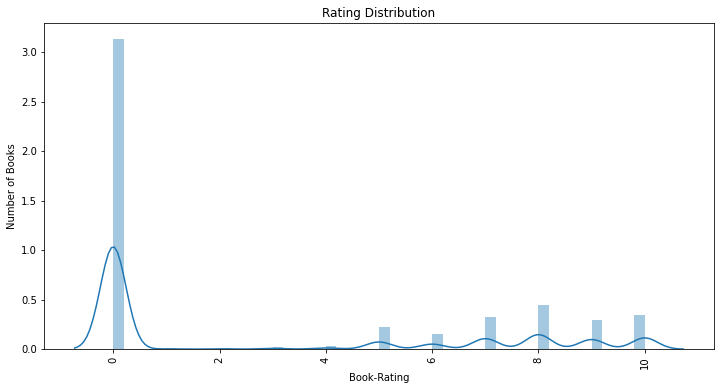

In [41]:
#checking distribution of Book ratings again
plt.figure(figsize=(12, 6))
sns.distplot(a=interactionsdf['Book-Rating'])
plt.title('Rating Distribution')
plt.xticks(rotation=90)
plt.ylabel('Number of Books')
plt.show()

As we can see there was not much change in the ratings columns which is what we expect, after forming the interactions data-frame, Now we should try to make the user-item interaction matrix from this data frame.

In [42]:
# creating the user-item interaction matrix and filling the nan values with 0
users_books_pivot_matrix_df = interactionsdf.pivot(index='User-ID', columns='ISBN', values='Book-Rating').fillna(0)
users_books_pivot_matrix_df

ValueError: ignored